This notebook runs through some basic classification problems using scikit-learn. The work is my own but the problems come from the machine learning workshop of Marcel Haas (https://github.com/harcel/ML_workshop).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

sns.set_style('white')
sns.set_context('poster')

In [2]:
#let's make some "blobs" for a simple classification example problem
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


This is what they look like, colored by the label:


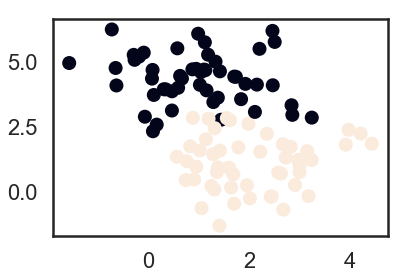

In [3]:
plt.scatter(X[:,0], X[:,1], c=y);
print("This is what they look like, colored by the label:")

(100, 1)
(100,)
0.94


/Users/topher/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


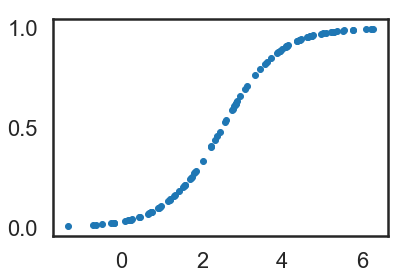

In [4]:
x = np.reshape(X[:,1], (-1, 1))     # That reshape trick is to get the right shape for the classifier
#x = X[:,1]                        # You can try to see what it does without!
print(np.shape(x))
print(np.shape(y))

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
myfit = classifier.fit(x, y)

print(myfit.score(x, y))

#we can also get the probabilities predicted for each example
probs = myfit.predict_proba(x)
plt.plot(x, probs[:,0], '.')

/Users/topher/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.92


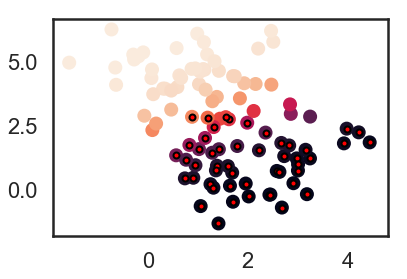

In [5]:
#now let's fit on the two features

myfit = classifier.fit(X, y)

print(myfit.score(X, y))

#we can also get the probabilities predicted for each example
probs = myfit.predict_proba(X)
#plt.plot(x, probs[:,0], '.')
plt.scatter(X[:,0], X[:,1], c=probs[:,0]);

these = y==1
plt.scatter(X[these,0], X[these,1], c='red', marker='.', edgecolors='k');


In [6]:

# Helper function for the plot
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/Users/topher/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.98
[[-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 1.44193252  2.76754364]
 [ 0.9867701   6.08965782]
 [ 2.11567076  3.06896151]
 [ 2.50904929  5.7731461 ]
 [-0.73000011  6.25456272]
 [ 1.37861172  3.61897724]
 [ 0.57309313  5.5262324 ]
 [ 2.46452227  6.1996765 ]
 [ 3.2460247   2.84942165]
 [ 2.85942078  2.95602827]
 [ 1.84070628  3.56162231]
 [ 1.28933778  3.44969159]
 [ 0.1631238   2.57750473]
 [ 0.46546494  3.12315514]
 [-1.57671974  4.95740592]
 [ 4.21850347  2.23419161]
 [ 3.97820955  2.37817845]
 [ 3.18190344 -0.18226785]
 [ 0.73936011  0.43607906]
 [ 2.3535057   2.22404956]
 [ 1.62011397  2.74692739]
 [ 1.98702592  2.61100638]
 [ 0.56400993  1.33705536]
 [ 0.88214412  2.84128485]
 [ 2.68049897 -0.704394  ]
 [ 1.55723507  2.82719571]
 [ 3.15492712  1.55292739]
 [ 1.19404184  2.80772861]
 [ 1.05505217 -0.64710744]
 [ 1.41164912 -1.32573949]
 [ 0.829832    1.74202664]]


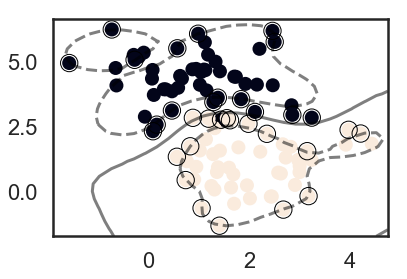

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
myfit = classifier.fit(X, y)

print(myfit.score(X, y))

#we can also get the probabilities predicted for each example
#probs = myfit.predict_proba(X)
#plt.plot(x, probs[:,0], '.')
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y);

#these = y==1
#plt.scatter(X[these,0], X[these,1], c='red', marker='.', edgecolors='k');
plot_svc_decision_function(myfit, ax)

print(myfit.support_vectors_)

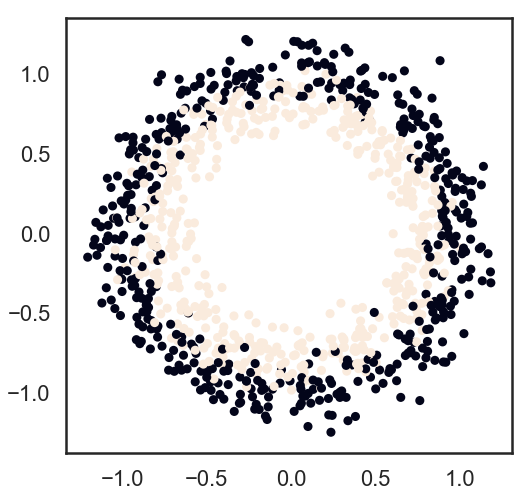

In [8]:
#Let's try a new dataset:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=.8, noise=.1)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

0.59


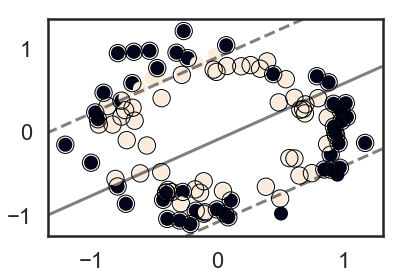

In [9]:
classifier = SVC(kernel='linear')

#let's take a small subset and see how it does
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.90)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

myfit = classifier.fit(X_train, y_train)

print(myfit.score(X_train, y_train))

#we can also get the probabilities predicted for each example
#probs = myfit.predict_proba(X)
#plt.plot(x, probs[:,0], '.')
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=y_train);

#these = y==1
#plt.scatter(X[these,0], X[these,1], c='red', marker='.', edgecolors='k');
plot_svc_decision_function(myfit, ax)

#so when doing a linear kernel, the location of the separator varies strongly depending on subsample.
#Also pretty much all the points are support vectors, so this is obviously a bad model to try

0.85


/Users/topher/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


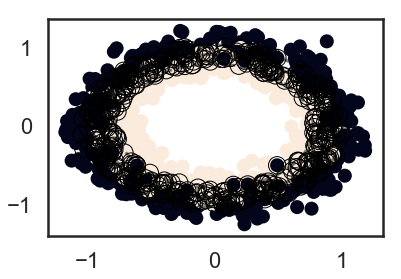

In [10]:
#try the rbf kernerl instead which captures radial dependencies
classifier = SVC(kernel='rbf', C=1.0)

#let's take a small subset and see how it does
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

myfit = classifier.fit(X_train, y_train)

print(myfit.score(X_train, y_train))

#we can also get the probabilities predicted for each example
#probs = myfit.predict_proba(X)
#plt.plot(x, probs[:,0], '.')
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=y_train);

#these = y==1
#plt.scatter(X[these,0], X[these,1], c='red', marker='.', edgecolors='k');
plot_svc_decision_function(myfit, ax)

#running the SVC on small subsamples the score remains very high down to small sample sizes
# as long as the samples are well separated to begin with
#also softening parameter if too low then get lower score when samples are pretty blended.

In [11]:
# Decision trees
import pandas as pd

titanic = pd.read_csv(os.path.join('ML_workshop-master/data', 'titanic3.csv'))
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
#let's try to predict whether people will survive or not

labels = titanic.survived.values
features = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

#make some features categorical, into 1's and 0's to make it easier to deal with
features_dummies = pd.get_dummies(features, columns=['pclass', 'sex', 'embarked'])
features_dummies.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


In [13]:
data = features_dummies.values
type(data)

numpy.ndarray

In [14]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
classifier = DecisionTreeClassifier()

X = data.copy()
y = titanic[['survived']].values
X.shape, y.shape

((1309, 12), (1309, 1))

In [15]:
#let's clean up the data and run the classifier
from sklearn.impute import SimpleImputer, MissingIndicator

indicator = MissingIndicator(missing_values=np.nan, features="all")
mask_all = indicator.fit_transform(X)
mask_all

from sklearn.pipeline import FeatureUnion, make_pipeline
#here we're creating a transformer, which we put into the pipeline prior to fitting the model to preprocess the data.
# We impute the features, meaning we insert guesses into missing features
# But we also indicate which examples were missing features in case these guesses are way off
transformer = FeatureUnion( transformer_list=[ 
    ('features', SimpleImputer(strategy='mean')),
    ('indicators', MissingIndicator())])

clf = make_pipeline(transformer, DecisionTreeClassifier(max_depth=2, min_samples_split=2))
myfit = clf.fit(X, y)
print(myfit.score(X, y))

0.7883880825057296


In [17]:
#or simply impute X first, then run the decision tree, gives the same result
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
newX = imp.transform(X)
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
myfit = clf.fit(newX, y)
print(myfit.score(newX, y))

0.7883880825057296


In [18]:
list(features_dummies.columns)

['age',
 'sibsp',
 'parch',
 'fare',
 'pclass_1',
 'pclass_2',
 'pclass_3',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [19]:
#visualize the tree with "dot" files.
dotfile = open("ML_workshop-master/data/example_tree.dot", 'w')
export_graphviz(myfit, out_file = dotfile, feature_names = list(features_dummies.columns))
dotfile.close()
os.system("dot -Tpng ML_workshop-master/data/example_tree.dot -o simple_tree.png")

0

In [ ]:
# To go futher we'd want to run it on a training set, optimize some of the hyperparams on a test set
# and finally check the actual real-world performance on a validation set